In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.integrate import quad
%matplotlib widget

Util-функции

In [2]:
def draw_plots(rows, cols, width, height, subplot_data):
    fig, axes = plt.subplots(rows, cols, figsize=(width, height))
    axes = axes.flatten() if rows * cols > 1 else [axes]

    flat_data = [item for row in subplot_data for item in row]

    for idx, data in enumerate(flat_data):
        if idx >= len(axes):
            raise ValueError(f"Too many subplots provided in 'subplot_data': expected at most {rows * cols}, got more.")
        if not data:
            continue

        ax = axes[idx]

        (
            x_arrays, y_arrays,
            labels,
            x_label, y_label,
            colors, linestyles,
            linewidth, markers,
            markersizes
        ) = data + (None,) * (10 - len(data))

        num_plots = len(y_arrays)

        for i in range(num_plots):
            x = x_arrays[i]
            y = y_arrays[i]

            label = labels[i] if labels and i < len(labels) else None
            color = colors[i] if colors and i < len(colors) else None
            linestyle = linestyles[i] if linestyles and i < len(linestyles) else '-'
            lw = linewidth[i] if linewidth and i < len(linewidth) else 2
            marker = markers[i] if markers and i < len(markers) else None
            markersize = markersizes[i] if markersizes and i < len(markersizes) else None

            ax.plot(x, y,
                    label=label,
                    color=color,
                    linestyle=linestyle,
                    linewidth=lw,
                    marker=marker,
                    markersize=markersize)

        if labels:
            ax.legend()
        ax.grid(True)
        if x_label:
            ax.set_xlabel(x_label)
        if y_label:
            ax.set_ylabel(y_label)
    
    for idx in range(len(flat_data), len(axes)):
        fig.delaxes(axes[idx])
        
    plt.gca().set_axisbelow(True) 
    plt.tight_layout()
    plt.show()

Наборы значений

In [3]:
ab = ((1, 3), (2, 2), (3, 1))

# Задание 1

#### Функции

In [4]:
rect_func = lambda t, a, b: a if abs(t) <= b else 0
triangle_func = lambda t, a, b: a - abs(a * t / b) if abs(t) <= b else 0
card_sin = lambda t, a, b: a * np.sinc(b * t)
hauss = lambda t, a, b: a * np.exp(- b * t * t)
two_way_attenuation = lambda t, a, b: a * np.exp(- b * abs(t))

#### Фурье-образы функций

In [5]:
fourier_transform_rect_func = lambda w, a, b: a * np.sqrt(2) * np.sin(w * b) / (w * np.sqrt(np.pi))
fourier_transform_triangle_func = lambda w, a, b: 2 * np.sqrt(2) * a * np.sin(w * b / 2) ** 2 / (w * w * b * np.sqrt(np.pi))
fourier_transform_card_sin = lambda w, a, b: np.sqrt(np.pi / 2) * a / b if abs(w) < b else 0
fourier_transform_hauss = lambda w, a, b: a * np.sqrt(1 / (2 * b)) * np.exp(- w * w / (4 * b))
fourier_transform_two_way_attenuation = lambda w, a, b: a * b * np.sqrt(2 / np.pi) / (b * b + w * w)

#### Проверка равенства Парсеваля

In [6]:
def parseval_check(function_1, function_2, args):
    limits=(-np.inf, np.inf)
    t_integrand = lambda t: np.abs(function_1(t, *args))**2
    t_integral, _ = quad(t_integrand, limits[0], limits[1])

    w_integrand = lambda w: np.abs(function_2(w, *args))**2
    w_integral, _ = quad(w_integrand, limits[0], limits[1])

    relative_error = np.abs(t_integral - w_integral) / max(t_integral, w_integral)
    latex_output = r"""\noindent
$\text{$|||f(t)||^2 - ||f(\omega)||^2| = %.3e$}$\\
$||f(t)||^2 = %.5f$\\
$||f(\omega)||^2 = %.5f$\\
""" % (relative_error, t_integral, w_integral)

    print(latex_output)

### Построим графики

In [7]:
t_spaces = [
    np.linspace(-8, 8, 1000), 
    np.linspace(-8, 8, 1000), 
    np.linspace(-8, 8, 1000), 
    np.linspace(-8, 8, 1000), 
    np.linspace(-8, 8, 1000)
]
w_spaces = [
    np.linspace(-20, 20, 1000), 
    np.linspace(-20, 20, 1000), 
    np.linspace(-20, 20, 1000), 
    np.linspace(-20, 20, 1000), 
    np.linspace(-20, 20, 1000)
]
ft = [
    [[rect_func(t, a, b) for t in t_spaces[0]] for (a, b) in ab],
    [[triangle_func(t, a, b) for t in t_spaces[1]] for (a, b) in ab],
    [[card_sin(t, a, b) for t in t_spaces[2]] for (a, b) in ab],
    [[hauss(t, a, b) for t in t_spaces[3]] for (a, b) in ab],
    [[two_way_attenuation(t, a, b) for t in t_spaces[4]] for (a, b) in ab]
]
fw = [
    [[fourier_transform_rect_func(w, a, b) for w in w_spaces[0]] for (a, b) in ab],
    [[fourier_transform_triangle_func(w, a, b) for w in w_spaces[1]] for (a, b) in ab],
    [[fourier_transform_card_sin(w, a, b) for w in w_spaces[2]] for (a, b) in ab],
    [[fourier_transform_hauss(w, a, b) for w in w_spaces[3]] for (a, b) in ab],
    [[fourier_transform_two_way_attenuation(w, a, b) for w in w_spaces[4]] for (a, b) in ab]
]

In [8]:
colors = ['blue', 'green', 'red']
linestyles = ['-', '-', '-']
labels = [f"(a={a}, b={b})" for (a, b) in ab]

subplot_data = []

for i in range(5):
    time_plot = (
        [t_spaces[i]] * len(ab),
        ft[i],
        labels,
        "t, sec", "f(t)",
        colors, linestyles,
        [1.5]*len(ab),
        [None]*len(ab),
        [None]*len(ab)
    )

    freq_plot = (
        [w_spaces[i]] * len(ab),
        fw[i],
        labels,
        "w, rad/sec", "f(w)",
        colors, linestyles,
        [1.5]*len(ab),
        [None]*len(ab),
        [None]*len(ab)
    )

    subplot_data.append([time_plot, freq_plot])

#### Прямоугольная функция

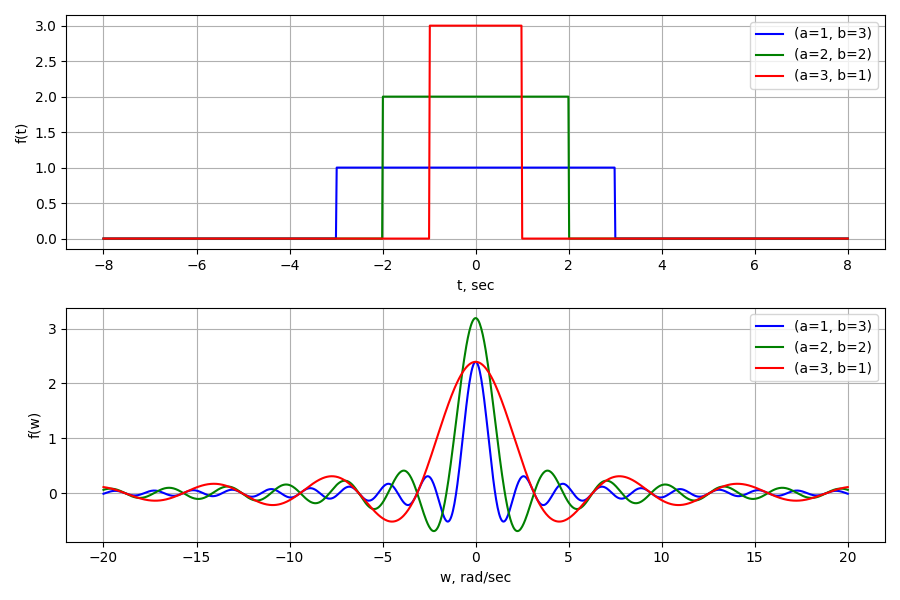

\newline\noindent$a=1.00, b=3.00:$\\
\noindent
$\text{$|||f(t)||^2 - ||f(\omega)||^2| = 1.737e-04$}$\\
$||f(t)||^2 = 6.00000$\\
$||f(\omega)||^2 = 5.99896$\\

\newline\noindent$a=2.00, b=2.00:$\\
\noindent
$\text{$|||f(t)||^2 - ||f(\omega)||^2| = 8.238e-05$}$\\
$||f(t)||^2 = 16.00000$\\
$||f(\omega)||^2 = 16.00132$\\

\newline\noindent$a=3.00, b=1.00:$\\
\noindent
$\text{$|||f(t)||^2 - ||f(\omega)||^2| = 4.555e-05$}$\\
$||f(t)||^2 = 18.00000$\\
$||f(\omega)||^2 = 18.00082$\\



/tmp/ipykernel_166684/4239311137.py:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  w_integral, _ = quad(w_integrand, limits[0], limits[1])


In [9]:
draw_plots(rows=2, cols=1, width=9, height=6, subplot_data=[[plot] for plot in subplot_data[0]])
for a, b in ab:
    print(r"\newline\noindent$a=%.2f, b=%.2f:$\\" % (a, b)) 
    parseval_check(rect_func, fourier_transform_rect_func, (a, b))

#### Треугольная функция

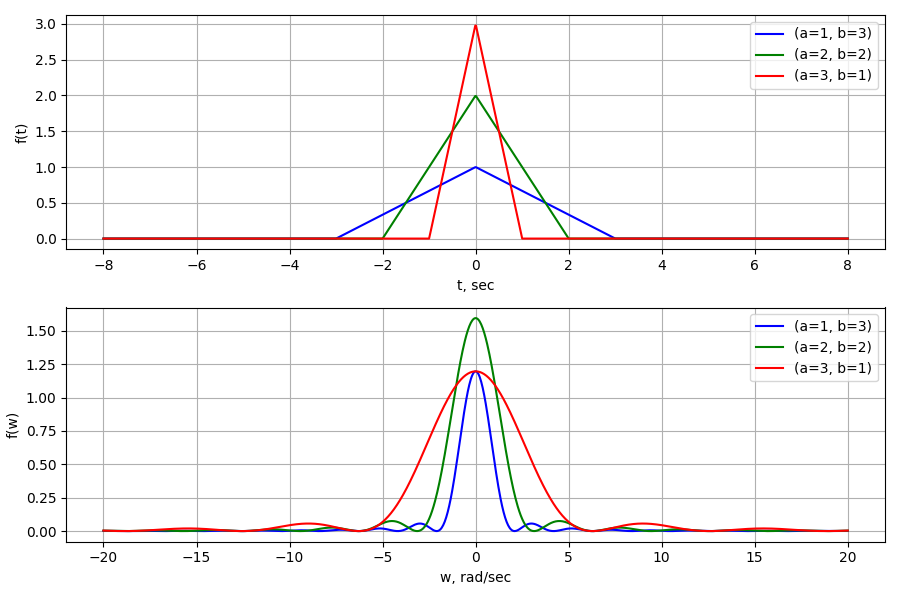

\newline\noindent$a=1.00, b=3.00:$\\
\noindent
$\text{$|||f(t)||^2 - ||f(\omega)||^2| = 2.585e-08$}$\\
$||f(t)||^2 = 2.00000$\\
$||f(\omega)||^2 = 2.00000$\\

\newline\noindent$a=2.00, b=2.00:$\\
\noindent
$\text{$|||f(t)||^2 - ||f(\omega)||^2| = 4.238e-09$}$\\
$||f(t)||^2 = 5.33333$\\
$||f(\omega)||^2 = 5.33333$\\

\newline\noindent$a=3.00, b=1.00:$\\
\noindent
$\text{$|||f(t)||^2 - ||f(\omega)||^2| = 1.064e-09$}$\\
$||f(t)||^2 = 6.00000$\\
$||f(\omega)||^2 = 6.00000$\\



/tmp/ipykernel_166684/4239311137.py:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  w_integral, _ = quad(w_integrand, limits[0], limits[1])


In [10]:
draw_plots(rows=2, cols=1, width=9, height=6, subplot_data=[[plot] for plot in subplot_data[1]])
for a, b in ab:
    print(r"\newline\noindent$a=%.2f, b=%.2f:$\\" % (a, b)) 
    parseval_check(triangle_func, fourier_transform_triangle_func, (a, b))

#### Кардинальный синус

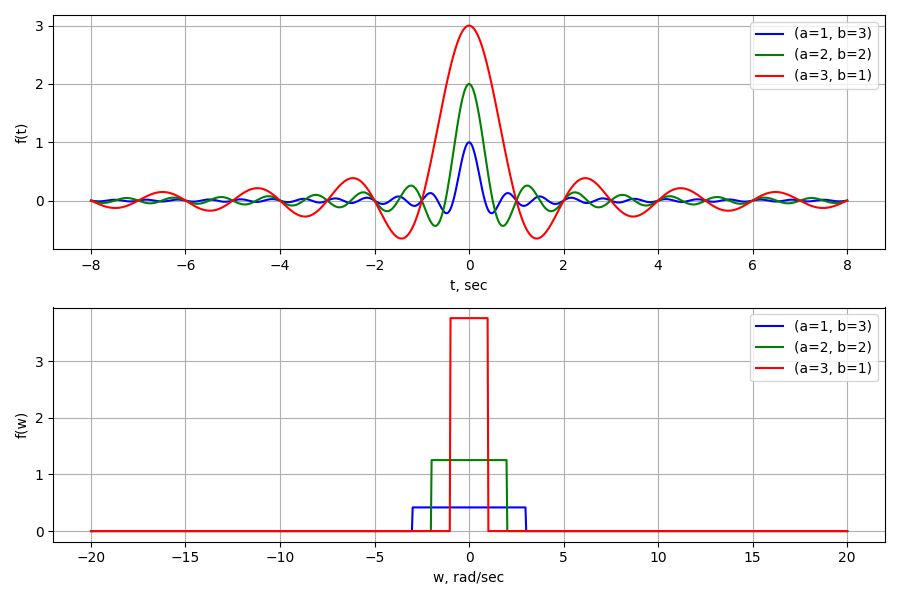

\newline\noindent$a=1.00, b=3.00:$\\
\noindent
$\text{$|||f(t)||^2 - ||f(\omega)||^2| = 6.817e-01$}$\\
$||f(t)||^2 = 0.33337$\\
$||f(\omega)||^2 = 1.04720$\\

\newline\noindent$a=2.00, b=2.00:$\\
\noindent
$\text{$|||f(t)||^2 - ||f(\omega)||^2| = 6.817e-01$}$\\
$||f(t)||^2 = 2.00017$\\
$||f(\omega)||^2 = 6.28319$\\

\newline\noindent$a=3.00, b=1.00:$\\
\noindent
$\text{$|||f(t)||^2 - ||f(\omega)||^2| = 6.818e-01$}$\\
$||f(t)||^2 = 8.99796$\\
$||f(\omega)||^2 = 28.27433$\\



/tmp/ipykernel_166684/4239311137.py:4: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  t_integral, _ = quad(t_integrand, limits[0], limits[1])


In [11]:
draw_plots(rows=2, cols=1, width=9, height=6, subplot_data=[[plot] for plot in subplot_data[2]])
for a, b in ab:
    print(r"\newline\noindent$a=%.2f, b=%.2f:$\\" % (a, b)) 
    parseval_check(card_sin, fourier_transform_card_sin, (a, b))

#### Функция Гаусса

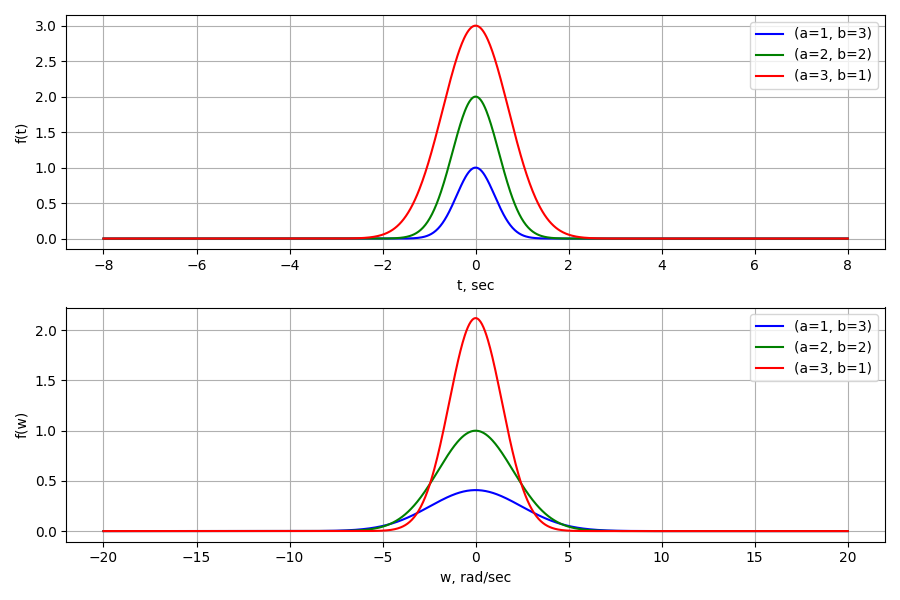

\newline\noindent$a=1.00, b=3.00:$\\
\noindent
$\text{$|||f(t)||^2 - ||f(\omega)||^2| = 1.534e-16$}$\\
$||f(t)||^2 = 0.72360$\\
$||f(\omega)||^2 = 0.72360$\\

\newline\noindent$a=2.00, b=2.00:$\\
\noindent
$\text{$|||f(t)||^2 - ||f(\omega)||^2| = 2.506e-16$}$\\
$||f(t)||^2 = 3.54491$\\
$||f(\omega)||^2 = 3.54491$\\

\newline\noindent$a=3.00, b=1.00:$\\
\noindent
$\text{$|||f(t)||^2 - ||f(\omega)||^2| = 9.449e-16$}$\\
$||f(t)||^2 = 11.27983$\\
$||f(\omega)||^2 = 11.27983$\\



In [12]:
draw_plots(rows=2, cols=1, width=9, height=6, subplot_data=[[plot] for plot in subplot_data[3]])
for a, b in ab:
    print(r"\newline\noindent$a=%.2f, b=%.2f:$\\" % (a, b)) 
    parseval_check(hauss, fourier_transform_hauss, (a, b))

#### Двустороннее затухание

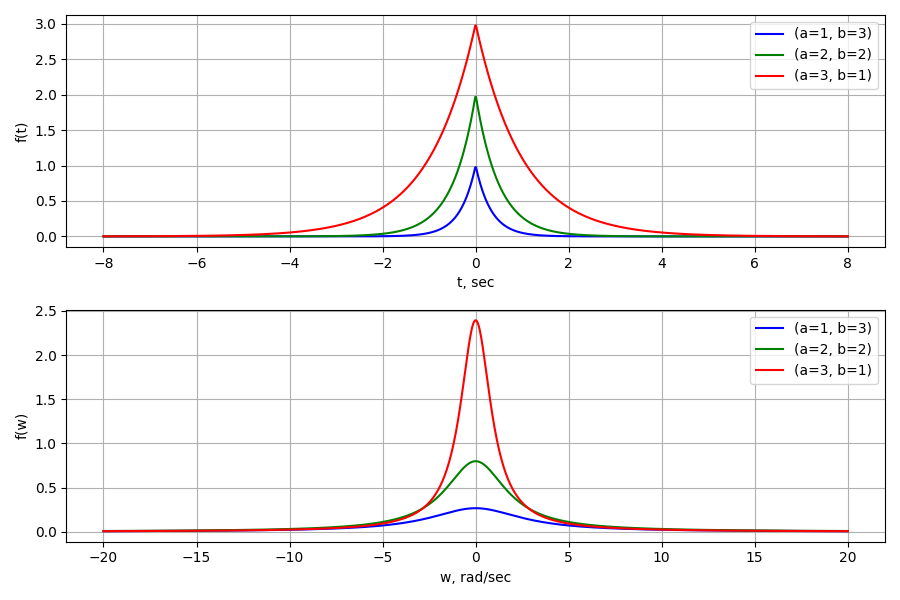

\newline\noindent$a=1.00, b=3.00:$\\
\noindent
$\text{$|||f(t)||^2 - ||f(\omega)||^2| = 1.665e-16$}$\\
$||f(t)||^2 = 0.33333$\\
$||f(\omega)||^2 = 0.33333$\\

\newline\noindent$a=2.00, b=2.00:$\\
\noindent
$\text{$|||f(t)||^2 - ||f(\omega)||^2| = 1.221e-15$}$\\
$||f(t)||^2 = 2.00000$\\
$||f(\omega)||^2 = 2.00000$\\

\newline\noindent$a=3.00, b=1.00:$\\
\noindent
$\text{$|||f(t)||^2 - ||f(\omega)||^2| = 1.974e-16$}$\\
$||f(t)||^2 = 9.00000$\\
$||f(\omega)||^2 = 9.00000$\\



In [13]:
draw_plots(rows=2, cols=1, width=9, height=6, subplot_data=[[plot] for plot in subplot_data[4]])
for a, b in ab:
    print(r"\newline\noindent$a=%.2f, b=%.2f:$\\" % (a, b)) 
    parseval_check(two_way_attenuation, fourier_transform_two_way_attenuation, (a, b))